In [13]:
import numpy as np  #數值運算套件
import matplotlib.pyplot as plt  # 繪圖套件
from PIL import Image  # 圖片處理套件

# PyTorch 相關套件
import torch  # PyTorch 主套件
from torchvision import transforms  # 資料轉換工具
from torchvision.models import vgg16  # VGG-16 模型

# scorecam 相關套件
from utils import basic_visualize, visualize, gradient_visualize, overlay_visualize
from cam.scorecam import *

In [14]:
# 載入預訓練的 VGG 模型
model = vgg16(pretrained=True)
# 設定為評估模式
model.eval()

# 定義圖像預處理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

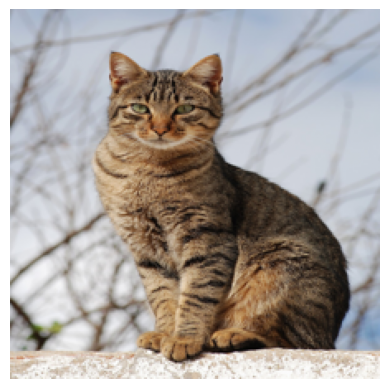

In [15]:
# 載入測試圖像與遮罩
img_path = './origin_image/cat2.jpg' 
mask_path = './mask_image/cat2.png'
img = Image.open(img_path).convert('RGB')

# 顯示原始圖像
plt.imshow(np.array(img.resize((224, 224))) / 255.0)
plt.axis('off')
plt.show()

In [16]:
# 增加批量維度
input_tensor = transform(img).unsqueeze(0)

# 預測
output = model(input_tensor)

# 索引找出預測標籤
idx = torch.argmax(output, dim=1).item()

imagenet_labels = []
with open('imagenet_classes.txt', 'r') as f:
    imagenet_labels = [line.strip() for line in f.readlines()]
    
print('預測結果：', torch.argmax(output, dim=1).item())
print('預測標籤：', imagenet_labels[idx])

預測結果： 285
預測標籤： Egyptian cat


In [17]:
vgg_model_dict = dict(type='vgg16', arch=model, layer_name='features_29',input_size=(224, 224))
vgg_model_dict

In [19]:
vgg_scorecam = ScoreCAM(vgg_model_dict)

In [20]:
# 計算 ScoreCAM
scorecam_map = vgg_scorecam(input_tensor)

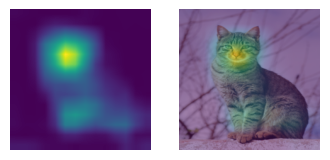

In [21]:
with torch.no_grad():
    # 可視化
    basic_visualize(input_tensor.cpu(), scorecam_map.type(torch.FloatTensor).cpu())

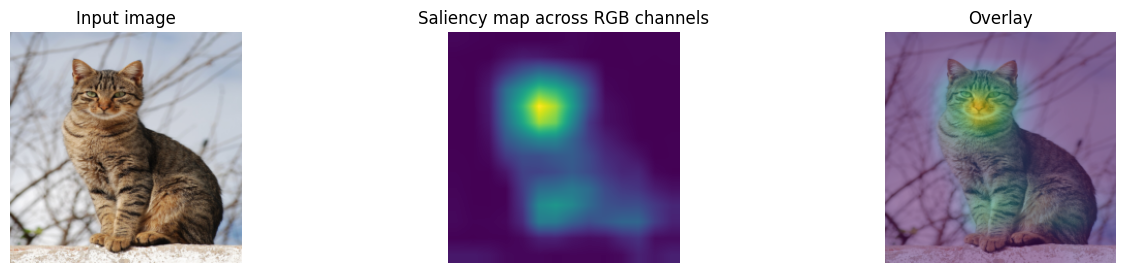

In [22]:
with torch.no_grad():
    # 可視化
    visualize(input_tensor.cpu(), scorecam_map.type(torch.FloatTensor).cpu())

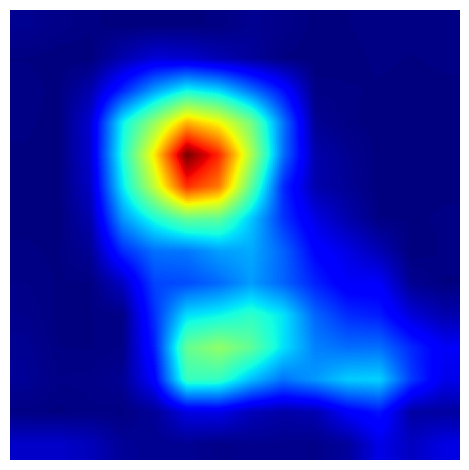

In [23]:
with torch.no_grad():
    # 可視化
    gradient_visualize(scorecam_map.type(torch.FloatTensor).cpu(), cmap='jet')

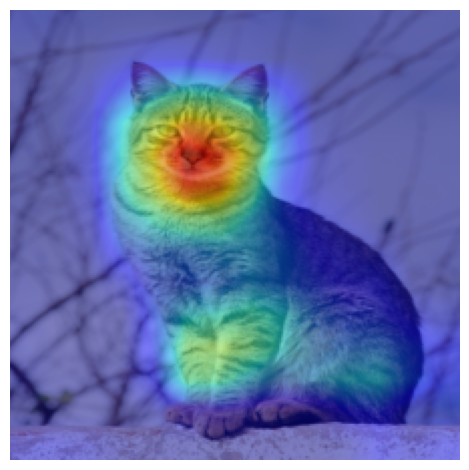

In [24]:
with torch.no_grad():
    # 可視化
    overlay_visualize(input_tensor.cpu(), scorecam_map.type(torch.FloatTensor).cpu(), cmap='jet')